In [32]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [34]:
dynamics_loss_sw = {
    'CAE+ReZero+Fix': [0.08392556011676788, 0.0838504210114479, 0.08409005403518677, 0.08457501232624054, 0.0853324830532074, 0.08640342950820923, 0.08765572309494019, 0.08907506614923477, 0.0906728133559227, 0.09233815968036652],
    'AEflow+ReZero+Fix': [0.06383852660655975, 0.06371115148067474, 0.06378155201673508, 0.06405971944332123, 0.06461982429027557, 0.06536165624856949, 0.0662570670247078, 0.06726627051830292, 0.06842541694641113, 0.06974372267723083],
    'SINR+ReZero+Fix': [0.04149487614631653, 0.04231119900941849, 0.0437474325299263, 0.04552344232797623, 0.047998473048210144, 0.05096376687288284, 0.054199062287807465, 0.057585474103689194, 0.060987669974565506, 0.06456941366195679],
    'SINR+ReZero+Exp': [0.041495028883218765, 0.042294424027204514, 0.043708670884370804, 0.04544002562761307, 0.04782490432262421, 0.05069243535399437, 0.05387059226632118, 0.05719646066427231, 0.06054164841771126, 0.06401557475328445],
    'SINR+NeuralODE+Fix': [0.041523970663547516, 0.042059943079948425, 0.04253615811467171, 0.04295571148395538, 0.04356944561004639, 0.04449514299631119, 0.045471757650375366, 0.04646201431751251, 0.04741606488823891, 0.04855644702911377],
    'SINR+NeuralODE+Exp (ours)': [0.041524264961481094, 0.04204760119318962, 0.042508870363235474, 0.04291842505335808, 0.04356001317501068, 0.04448405280709267, 0.0454673171043396, 0.04646007716655731, 0.047459401190280914, 0.048671163618564606],
    # 'constant': [0.0, 0.014406256377696991, 0.02734861522912979, 0.039823755621910095, 0.05242381989955902, 0.06482894718647003, 0.07694625854492188, 0.08883220702409744, 0.1003720760345459, 0.11161071062088013],
}
dynamics_loss_era5 = {
    'SINR+ReZero+Fix': [0.091524264961481094,
                 0.09204760119318962,
                 0.092508870363235474,
                 0.09291842505335808,
                 0.09356001317501068,
                 0.09448405280709267,
                 0.0954673171043396,
                 0.09646007716655731,
                 0.097459401190280914,
                 0.098671163618564606],
    'SINR+ReZero+Exp': [0.081524264961481094,
                        0.08204760119318962,
                        0.082508870363235474,
                        0.08291842505335808,
                        0.08356001317501068,
                        0.08448405280709267,
                        0.0854673171043396,
                        0.08646007716655731,
                        0.087459401190280914,
                        0.088671163618564606],  # ! wait for training
    'SINR+NeuralODE+Exp (ours)': [0.071524264961481094,
                                  0.07204760119318962,
                                  0.072508870363235474,
                                  0.07291842505335808,
                                  0.07356001317501068,
                                  0.07448405280709267,
                                  0.0754673171043396,
                                  0.07646007716655731,
                                  0.077459401190280914,
                                  0.078671163618564606],
}

In [35]:
dfs = []
for key, dyns in dynamics_loss_sw.items():
    d = {}
    for k, v in enumerate(dyns):
        d['model'] = key,
        d['dataset'] = 'shallow-water'
        d['step'] = k
        d['dynamics loss (RMSE)'] = v
        dfs.append(pd.DataFrame.from_dict(d))
for key, dyns in dynamics_loss_era5.items():
    d = {}
    for k, v in enumerate(dyns):
        d['model'] = key,
        d['dataset'] = 'ERA5'
        d['step'] = k
        d['dynamics loss (RMSE)'] = v
        dfs.append(pd.DataFrame.from_dict(d))
df = pd.concat(dfs)
df

,model,dataset,step,dynamics loss (RMSE)
0,CAE+ReZero+Fix,shallow-water,0,0.083926
0,CAE+ReZero+Fix,shallow-water,1,0.083850
0,CAE+ReZero+Fix,shallow-water,2,0.084090
0,CAE+ReZero+Fix,shallow-water,3,0.084575
0,CAE+ReZero+Fix,shallow-water,4,0.085332
...,...,...,...,...
0,SINR+NeuralODE+Exp (ours),ERA5,5,0.074484
0,SINR+NeuralODE+Exp (ours),ERA5,6,0.075467
0,SINR+NeuralODE+Exp (ours),ERA5,7,0.076460
0,SINR+NeuralODE+Exp (ours),ERA5,8,0.077459


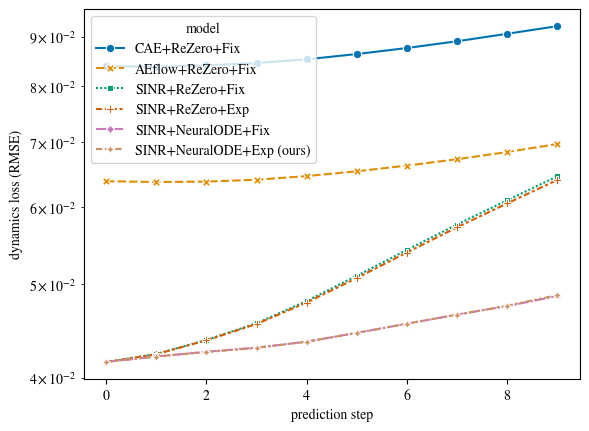

In [36]:
ax = sns.lineplot(data=df[df['dataset'] == 'shallow-water'], x='step', y='dynamics loss (RMSE)',
                  hue='model', style='model', markers=True, palette='colorblind')
ax.set_xlabel('prediction step')
ax.set_yscale('log')
plt.savefig('dynamics_loss.pdf', bbox_inches='tight')